In [3]:
import requests
import time
import re
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter

#워드클라우드 다운 링크 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

In [4]:
!pip install konlpy

from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Hannanum
from konlpy.tag import Okt

     |████████████████████████████████| 19.4 MB 772 kB/s 
     |████████████████████████████████| 448 kB 39.4 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [5]:
# 참고 사이트 https://yeo0.github.io/data/2018/09/24/5.-%EB%A1%9C%EA%B7%B8%EC%9D%B8%EC%9D%B4-%ED%95%84%EC%9A%94%ED%95%9C-%EC%82%AC%EC%9D%B4%ED%8A%B8%EC%97%90%EC%84%9C%EC%9D%98-%ED%81%AC%EB%A1%A4%EB%A7%81/
# 참고 사이트 2 https://hashcode.co.kr/questions/9084/%EC%9E%A1%ED%94%8C%EB%9E%98%EB%8B%9B-%EB%A1%9C%EA%B7%B8%EC%9D%B8-%ED%9B%84-%EC%8A%A4%ED%81%AC%EB%A0%88%EC%9D%B4%ED%95%91-%EB%AC%B8%EC%9D%98%EB%93%9C%EB%A6%BD%EB%8B%88%EB%8B%A4-%E3%85%9C%E3%85%9C

# 로그인 할 url
url = "https://www.jobplanet.co.kr/users/sign_in?_nav=gb"
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36'
headers = {'Content-type': 'application/json', 'Accept': 'text/plain', 'User-Agent':user_agent}
login_data = {'user':{'email':'hsmy31@hanyang.ac.kr', 'password':'rhkwpgksmswnd!', 'remember_me':'true'}}
session = requests.session()

# 로그인 실행
login_response = session.post(url, json = login_data, headers = headers)

In [26]:
def ind_reviews(code):
    url = "https://www.jobplanet.co.kr/reviews?&industry_id=" + str(code)
    response =  session.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    num = soup.find('span', class_='num') # 리뷰 개수 확인
    num = int(num.get_text().strip())
    import math, random
    pages = math.ceil(num / 10)
    page = random.sample(range(1, pages),30)
    reviews = {}
    for i in page: # 페이지를 랜덤으로 하여 300개의 리뷰 추출
        time.sleep(1)
        url = "https://www.jobplanet.co.kr/reviews?&industry_id=" + str(code) + "&page="+ str(i)
        response =  session.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        label = soup.find_all('h2', class_="us_label") # 한 줄 리뷰 추출
        # 추출한 리뷰에서 태그를 제외한 텍스트만 추출하여 labels 리스트에 저장
        labels = [label.get_text().strip() for label in label[:]]
        star = soup.find_all('div', class_="star_score") # 별점이 포함된 div 추출
        # 추출한 div에서 별점을 나타내는 width 속성의 숫자로 된 부분을 stars 리스트에 저장
        stars = re.findall('[0-9]+[.]+[0-9]', str(star))
        # reviews 딕셔너리에 '리뷰: 별점' 형식으로 추가
        for j in range(len(labels)):
            reviews[labels[j][5:-1]] = stars[j].replace('.0','')
    return reviews

In [27]:
# 각 산업군의 기업 리뷰 스크래핑
reviews1 = dict(ind_reviews(1001))

In [28]:
reviews1

{"'나도 안짤리지만 쟤도 안짤린다' . 표본을 보여줌": '72',
 '- 고시/비고시 출신 가림- 행정직이 일하기 좋음 그 외 직렬은 X- 업무량 많음- 조직이 커서 여러 업무 배우기 좋음': '70',
 '강남 핵심 지역에 위치해서 출퇴근이 편함. 편하게 다니기 좋은 곳.': '86',
 '강북구에 살고 워라밸을 원한다면 최고': '58',
 '강서구, 인근지역에 거주한다면 안정적으로 쭉 편하게 다닐 수 있는 기업': '44',
 '객관적으로 봤을 때 장점과 단점이 명확한 기업임다만, 일반직보다 업무직 무기직 처우가 더 좋음맘같아선 2점주고싶은데 일이 편하고 수도권근무라 4점줌': '62',
 '검사의, 검사에 의한, 검사를 위한 조직': '54',
 '경기도의 체육정책사업 운영만 하는 곳.공공기관 특성상 새롭게 정책을 제시하고 펼치기는 힘들다.대한체육회, 경기도청의 사업 위주 운영': '62',
 '경력에 대한 욕심은 없지만, 보고서 쓰고, 정리하는 걸 좋아하고, 거리가 가깝다면 다녀도 괜찮다.': '62',
 '경상남도 인구 100만의 통합 창원시, 세무서는 단두개!': '66',
 '경영평가만 잘받으면 된다는 생각으로 낮은자는 더 낮아지고 높은자는 더 챙기는 말뿐인 공기업 9급이하는 식물인간취급': '64',
 '경직된 조직 문화, 위계와 서열을 중시하고 정규직과 계약직 차별과 격차가 매우 심함': '40',
 '계약직밖에 없음\r사단법인이라 모든 권력이 소수에게 집중되어있음\r미래...? 없음': '40',
 '계약직으로 일하기 좋고 자기개발하기 좋은 곳 한번쯤은 해봐도 좋다': '74',
 '계약직은  아무 생각없이 다니기 좋은곳. 정규직으로 다니기엔 다소 피곤할수도': '66',
 '계약직의 경우. 시키는거 이것저것 다 해야함... 그리고 어느 계약직도 마찬가지겠지만, 고용 연장에 대한 불안감이 존재함.': '66',
 '계약직의 비애, 이왕이면 공무원시험을 보는 것을 추천합니다.': '46',
 '고이고 고였다. 나 갈 길 가는 분위기': '

In [29]:
#특수문자 제거
def sub(dic):
    dic = [re.sub(r"[^가-힣A-Za-z0-9]", " ", str(content)) for content in dic]
    return dic

In [30]:
#산업군 별 키워드 추출 후 리스트 생성
def extend(text):
    kkma=Kkma()
    temp=[]
    for i in text:
        temp.extend(kkma.nouns(i))
    return temp

In [31]:
review=extend(sub(reviews1))
review

['도시',
 '농촌',
 '경찰서',
 '있음',
 '관',
 '이상',
 '이상급',
 '급',
 '능력',
 '능력차이',
 '차이',
 '계약',
 '계약직과',
 '직과',
 '정규직',
 '차별',
 '공공',
 '공공기관',
 '기관',
 '프로세스',
 '경험',
 '수',
 '있음',
 '광주',
 '게이트',
 '구청',
 '투',
 '투톱',
 '톱',
 '시',
 '전입',
 '전입시험',
 '시험',
 '다',
 '탈출',
 '청사',
 '이전',
 '후',
 '환경',
 '짐',
 '짐야근',
 '야근',
 '강',
 '사내',
 '분위기',
 '워',
 '워라',
 '라',
 '수평적',
 '분위기',
 '속',
 '적응',
 '수',
 '검사원',
 '중요성',
 '부각',
 '공무원',
 '장점',
 '생기',
 '에너지',
 '폐쇄적',
 '조직성',
 '지도',
 '지도사',
 '사',
 '한번',
 '근무',
 '대다수',
 '근무지',
 '적응',
 '하면',
 '타지역',
 '동종',
 '동종업계',
 '업계',
 '소문',
 '이',
 '집합소',
 '인성',
 '팀원',
 '거기',
 '말',
 '자',
 '단순',
 '반복',
 '행정',
 '행정업무',
 '업무',
 '심사',
 '심사평가기관',
 '평가',
 '기관',
 '특성',
 '특성상',
 '상',
 '갑',
 '심',
 '민원',
 '을',
 '일',
 '의욕',
 '사람',
 '함',
 '데',
 '보람',
 '경영',
 '경영평가',
 '평가',
 '생각',
 '자',
 '말',
 '공기업',
 '9',
 '9급이하',
 '급',
 '이하',
 '식물',
 '식물인간취급',
 '인간',
 '취급',
 '부산',
 '회사',
 '초봉',
 '장기적',
 '연봉',
 '경쟁률',
 '경력',
 '욕심',
 '정리',
 '거리',
 '분야',
 '강의',
 '수',
 '곳',
 '강사',
 '경력',
 '도움',
 '새',
 '시설',
 '청',
 '청지

In [33]:
for i,v in enumerate(review):
    if len(v)<2:
        review.pop(i)

count=Counter(review)

words = dict(count.most_common(30))
words

{'가능': 10,
 '강도': 12,
 '경험': 20,
 '계약': 16,
 '계약직': 12,
 '공공': 16,
 '공공기관': 13,
 '공기업': 13,
 '공무원': 20,
 '근무': 25,
 '급여': 12,
 '기관': 32,
 '기업': 15,
 '다양': 14,
 '만족': 11,
 '문화': 13,
 '분위기': 25,
 '사람': 30,
 '생각': 19,
 '업무': 42,
 '인턴': 10,
 '있음': 26,
 '장점': 11,
 '조직': 10,
 '지방': 11,
 '직원': 18,
 '직장': 14,
 '추천': 10,
 '환경': 16,
 '회사': 30}

In [34]:
!apt-get install
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [35]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/tr

In [36]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib 
from matplotlib import rc

path ='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
font_name=fm.FontProperties(fname=path,size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [37]:

wc = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',  
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

In [38]:
wordcloud_words = wc.generate_from_frequencies(words)

# 새 섹션

<class 'numpy.ndarray'>
(800, 800, 3)


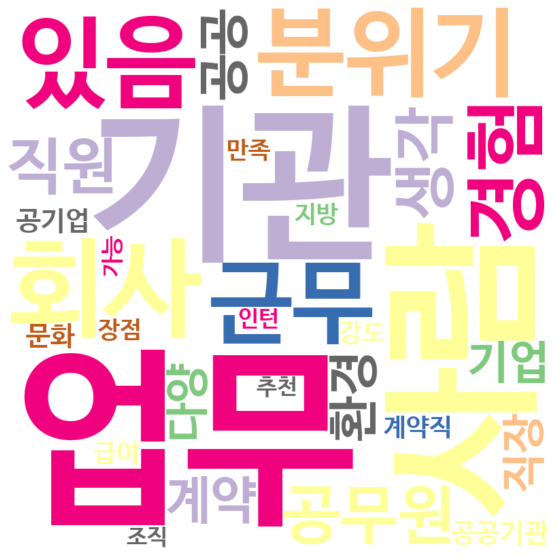

In [39]:
array = wc.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')